## Module 6.1.4

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Import citipy module
from citipy import citipy

In [4]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)
coordinates

[(3.049081410629924, -39.39979489702583),
 (-61.2141293819307, -132.2220339219108),
 (-62.7512744687137, -170.08080453691602),
 (-53.98306763054486, 122.15291650613761),
 (56.96958256202464, 84.74156029452826),
 (60.6735611277893, 55.85750948338983),
 (5.1673688123031525, -161.56022157907472),
 (55.11582509846491, 153.95266474298768),
 (14.5646586037371, 132.51654053733506),
 (3.8598267173572793, -33.69765690084634),
 (51.19970032494692, -26.066108732956337),
 (40.90068656805386, 50.058898033556005),
 (50.28907187852121, -108.3852124825365),
 (10.847914692550034, 61.261497466054294),
 (-66.69491987817665, -168.40468200047127),
 (5.366983330347551, -142.39778511328194),
 (58.14699347719761, -64.87478507249659),
 (45.80997791310185, 110.62385758280772),
 (61.62897894019895, 80.95252974877081),
 (-40.70826041511619, 116.54705093761731),
 (40.01282109106194, 97.92830903100997),
 (80.19456739404549, -127.35497098352322),
 (52.13521627248409, -70.95794402418481),
 (-0.5009491230118641, 122.4

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient number of cities in the list
len(cities)

608

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key


In [7]:
# Starting URL for weather Map API call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa


In [8]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "sitka"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa&q=sitka


## Module 6.2.6

In [9]:
# Import the time library and the datefime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnof of the logging
print("Beginning Data Retrieval       ")
print ("------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
------------------------------


In [11]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to SIO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #Error check
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
    
# Indicate loading is complete
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | samus
Processing Record 6 of Set 1 | cherdyn
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | sobolevo
Processing Record 9 of Set 1 | san policarpo
Processing Record 10 of Set 1 | jardim
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | nardaran
Processing Record 13 of Set 1 | gull lake
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | darhan
Processing Record 18 of Set 1 | kargasok
Processing Record 19 of Set 1 | yumen
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | dolbeau
'coord'
City not found. Skipping...
Processing Record 22 of Set 1 | luwuk
Processing Record 23 of Set 1 | oussouye
Processing Record 24 of Set 1 | kapaa
Processing Record

Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | horsham
Processing Record 45 of Set 4 | preobrazheniye
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | muroto
Processing Record 48 of Set 4 | altamira
Processing Record 49 of Set 4 | ngukurr
'coord'
City not found. Skipping...
Processing Record 50 of Set 4 | karaul
'coord'
City not found. Skipping...
Processing Record 1 of Set 5 | ahar
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | hay river
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | vanavara
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | stornoway
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | hualmay
Processing Record 11 of Set 5 | bontang
Processing Record 12 of Set 5 | portland
Processing Record 13 of Set 5 | bowen

Processing Record 26 of Set 8 | parkes
Processing Record 27 of Set 8 | georgetown
Processing Record 28 of Set 8 | bahia blanca
Processing Record 29 of Set 8 | jumla
Processing Record 30 of Set 8 | vila
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | juneau
Processing Record 34 of Set 8 | benoy
Processing Record 35 of Set 8 | nueva germania
Processing Record 36 of Set 8 | prado
Processing Record 37 of Set 8 | pangkalanbuun
Processing Record 38 of Set 8 | thompson
Processing Record 39 of Set 8 | tallahassee
Processing Record 40 of Set 8 | esperance
Processing Record 41 of Set 8 | hattiesburg
Processing Record 42 of Set 8 | saleaula
'coord'
City not found. Skipping...
Processing Record 43 of Set 8 | temaraia
'coord'
City not found. Skipping...
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | chom bung
'coord'
City not found. Skipping...
Processing Record 46 of Set 8 | clyde river
Processing Record 47 of Set 

Processing Record 9 of Set 12 | lavrentiya
Processing Record 10 of Set 12 | talaya
Processing Record 11 of Set 12 | saint-francois
Processing Record 12 of Set 12 | rio bueno
Processing Record 13 of Set 12 | andevoranto
'coord'
City not found. Skipping...
Processing Record 14 of Set 12 | lebyazhye
Processing Record 15 of Set 12 | aegviidu
Processing Record 16 of Set 12 | okakarara
Processing Record 17 of Set 12 | kaeo
Processing Record 18 of Set 12 | rocky mountain house
Processing Record 19 of Set 12 | visby
Processing Record 20 of Set 12 | urdoma
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | zhanatas
'coord'
City not found. Skipping...
Processing Record 23 of Set 12 | cocobeach
Processing Record 24 of Set 12 | zlobin
Processing Record 25 of Set 12 | satitoa
'coord'
City not found. Skipping...
Processing Record 26 of Set 12 | cheuskiny
'coord'
City not found. Skipping...
Processing Record 27 of Set 12 | puerto leguizamo
Processing Record 28 of Set 12 | co

In [41]:
# Print the city count to confirm sufficient number of cities in the list
len(city_data)

557

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acarau,-2.8856,-40.1200,82.47,67,100,10.58,BR,2023-01-16 16:00:13
1,Rikitea,-23.1203,-134.9692,76.89,70,14,8.79,PF,2023-01-16 16:00:18
2,Vaini,-21.2000,-175.2000,81.07,79,27,6.73,TO,2023-01-16 16:00:22
3,Albany,42.6001,-73.9662,33.57,66,45,9.08,US,2023-01-16 15:56:23
4,Samus,56.7475,84.6992,16.23,94,100,9.55,RU,2023-01-16 16:00:24
5,Cherdyn,60.4030,56.4787,7.48,90,90,8.95,RU,2023-01-16 16:00:25
6,Hilo,19.7297,-155.0900,77.29,90,55,7.00,US,2023-01-16 16:00:26
7,Sobolevo,54.4299,31.8996,30.78,97,100,9.71,RU,2023-01-16 16:00:27
8,San Policarpo,12.1791,125.5072,78.31,87,100,3.85,PH,2023-01-16 16:00:28
9,Jardim,-21.4803,-56.1381,89.64,49,15,4.25,BR,2023-01-16 16:00:28


In [43]:
# Reorder results of table to reade Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acarau,BR,2023-01-16 16:00:13,-2.8856,-40.1200,82.47,67,100,10.58
1,Rikitea,PF,2023-01-16 16:00:18,-23.1203,-134.9692,76.89,70,14,8.79
2,Vaini,TO,2023-01-16 16:00:22,-21.2000,-175.2000,81.07,79,27,6.73
3,Albany,US,2023-01-16 15:56:23,42.6001,-73.9662,33.57,66,45,9.08
4,Samus,RU,2023-01-16 16:00:24,56.7475,84.6992,16.23,94,100,9.55
5,Cherdyn,RU,2023-01-16 16:00:25,60.4030,56.4787,7.48,90,90,8.95
6,Hilo,US,2023-01-16 16:00:26,19.7297,-155.0900,77.29,90,55,7.00
7,Sobolevo,RU,2023-01-16 16:00:27,54.4299,31.8996,30.78,97,100,9.71
8,San Policarpo,PH,2023-01-16 16:00:28,12.1791,125.5072,78.31,87,100,3.85
9,Jardim,BR,2023-01-16 16:00:28,-21.4803,-56.1381,89.64,49,15,4.25


In [44]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Module 6.3.1 Plotting Data for school project

In [45]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


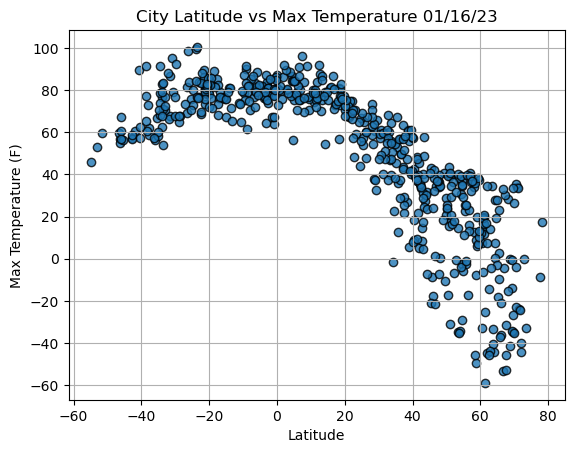

In [46]:
# Import the time module to set date and time
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1_maxTemp.png")

# Show plot
plt.show()


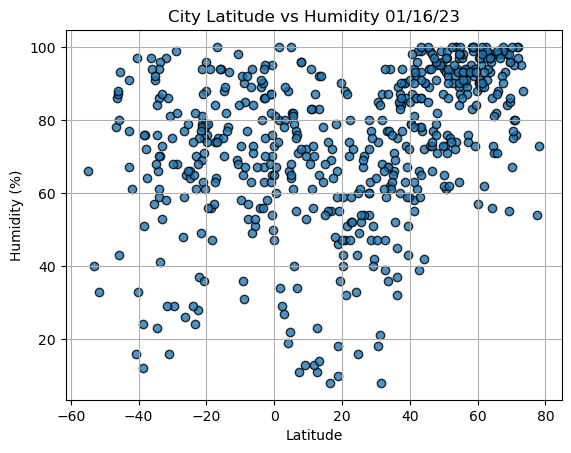

In [47]:
# Build the scatter plot for latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2_humidity.png")

# Show plot
plt.show()

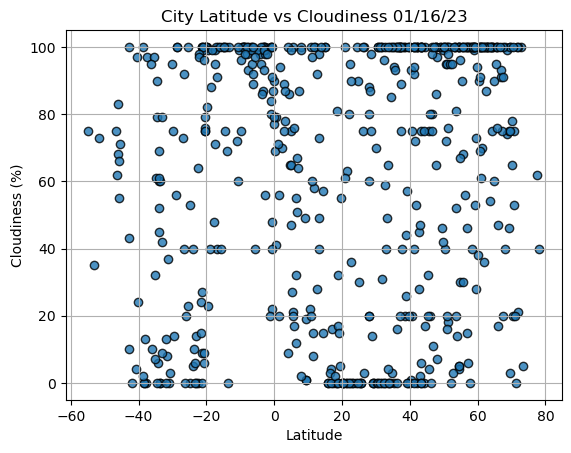

In [48]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3_cloudiness.png")

# Show plot
plt.show()

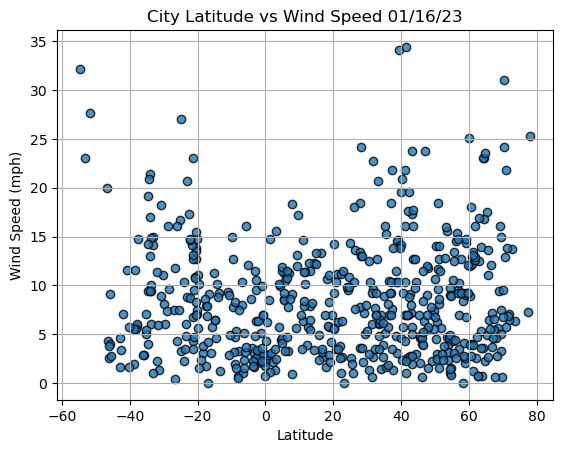

In [49]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4_windSpeed.png")

# Show plot
plt.show()

## Add Linear Regression to the above Scatter Plots

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Run regression on hemisphere weather data - linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [51]:
# Create a datafram from a datafram based on a single index
index13 = city_data_df.loc[13]
index13

City                      Salalah
Country                        OM
Date          2023-01-16 16:00:33
Lat                       17.0151
Lng                       54.0924
Max Temp                    72.91
Humidity                       72
Cloudiness                     16
Wind Speed                   2.68
Name: 13, dtype: object

In [52]:
# Create Norther and Souithern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acarau,BR,2023-01-16 16:00:13,-2.8856,-40.1200,82.47,67,100,10.58
1,Rikitea,PF,2023-01-16 16:00:18,-23.1203,-134.9692,76.89,70,14,8.79
2,Vaini,TO,2023-01-16 16:00:22,-21.2000,-175.2000,81.07,79,27,6.73
9,Jardim,BR,2023-01-16 16:00:28,-21.4803,-56.1381,89.64,49,15,4.25
14,Atuona,PF,2023-01-16 15:57:19,-9.8000,-139.0333,78.46,73,96,14.97
...,...,...,...,...,...,...,...,...,...
546,Salinopolis,BR,2023-01-16 16:16:24,-0.6136,-47.3561,80.28,76,100,6.93
549,Vangaindrano,MG,2023-01-16 16:17:26,-23.3500,47.6000,76.39,82,6,4.83
550,Roebourne,AU,2023-01-16 16:17:27,-20.7833,117.1333,82.74,71,9,10.71
551,Katherine,AU,2023-01-16 16:17:27,-14.4667,132.2667,79.12,89,75,4.61


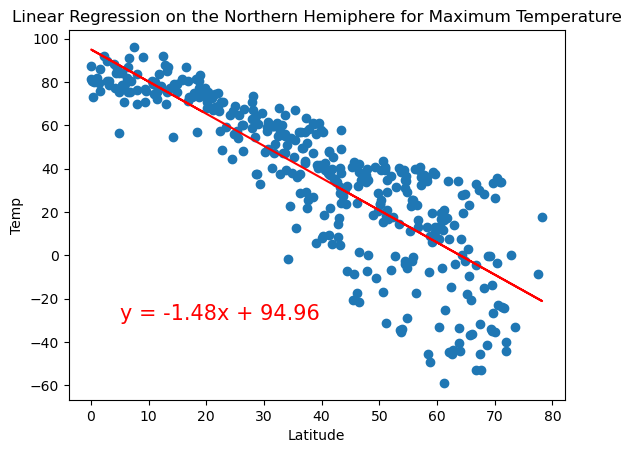

In [53]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemiphere for Maximum Temperature",
                       "Max Temp",(5,-30))

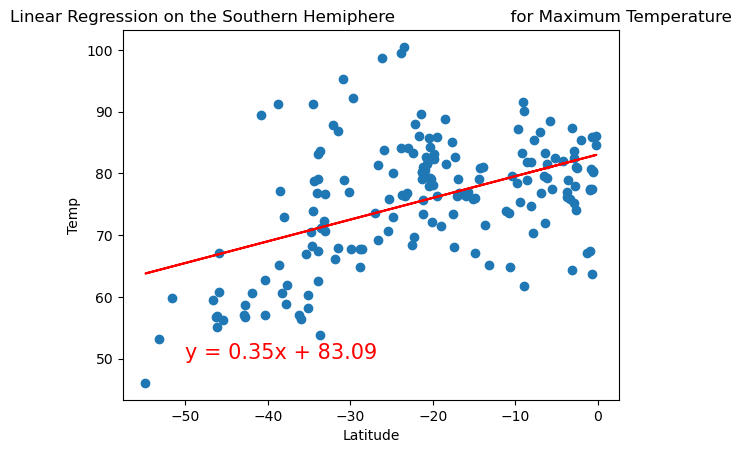

In [54]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                      for Maximum Temperature", "Max Temp",(-50,50))

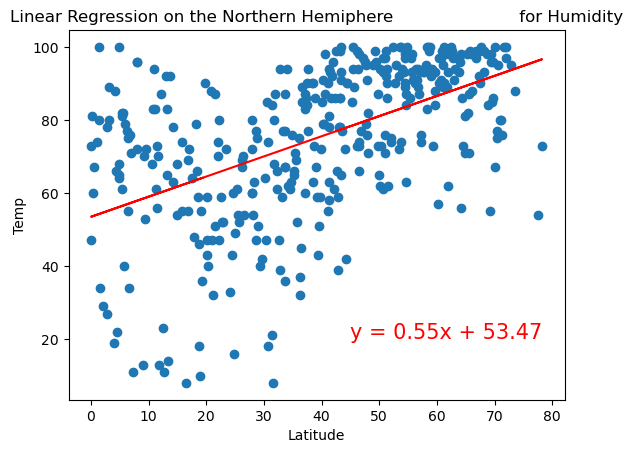

In [55]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Humidity", "Humidity",(45,20))

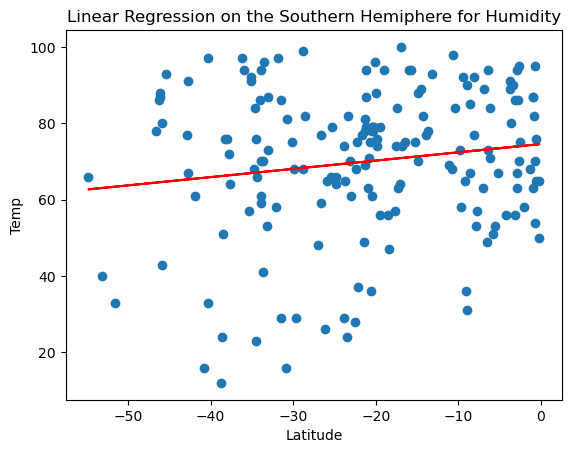

In [56]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere for Humidity",
                       "Humidity",(45,20))

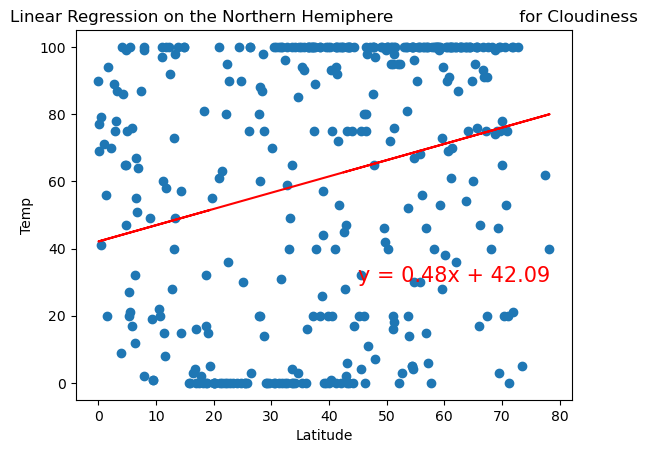

In [57]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Cloudiness", "Cloudiness",(45,30))

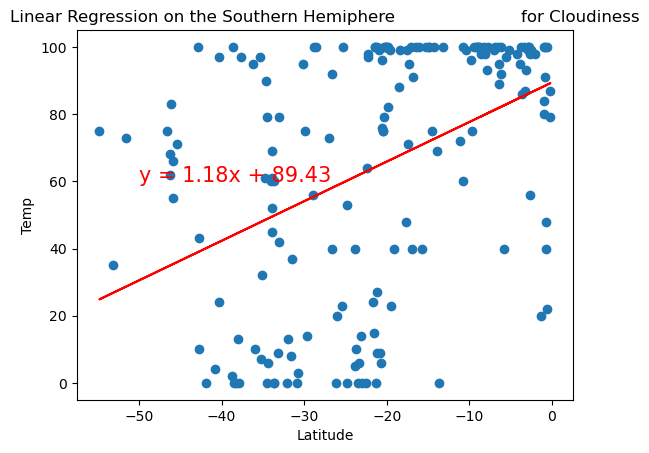

In [58]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                        for Cloudiness", "Cloudiness",(-50,60))

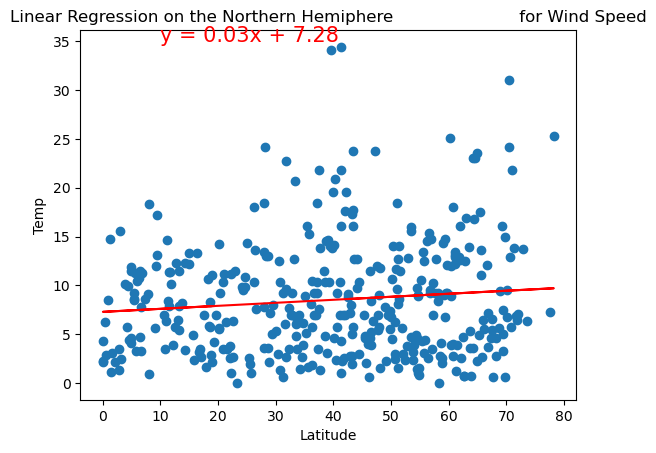

In [59]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Wind Speed", "Wind Speed",(10,35))

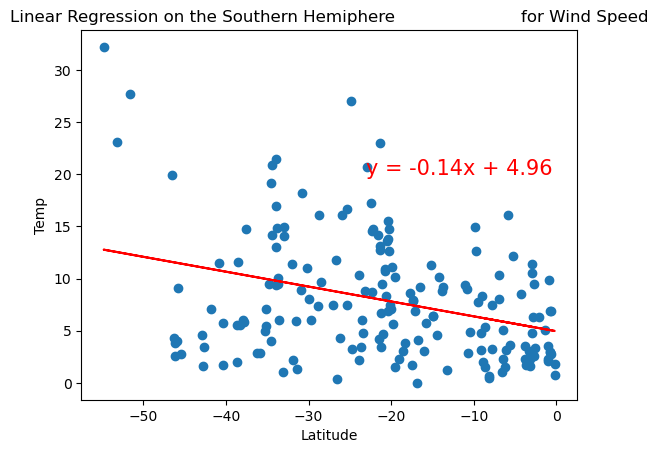

In [60]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                        for Wind Speed", "Wind Speed",(-23,20))

## GeoView Weather Maps

In [61]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

In [62]:
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [63]:
# Stors the CSV you saved (created in part 1) into a dataframe
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Acarau,BR,2023-01-16 16:00:13,-2.8856,-40.1200,82.47,67,100,10.58
1,1,Rikitea,PF,2023-01-16 16:00:18,-23.1203,-134.9692,76.89,70,14,8.79
2,2,Vaini,TO,2023-01-16 16:00:22,-21.2000,-175.2000,81.07,79,27,6.73
3,3,Albany,US,2023-01-16 15:56:23,42.6001,-73.9662,33.57,66,45,9.08
4,4,Samus,RU,2023-01-16 16:00:24,56.7475,84.6992,16.23,94,100,9.55


In [64]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [65]:
# Configure the GeoView map
map_plot_1 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM")

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [66]:
# Configure the GeoView map
map_plot_2 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [67]:
# Configure the GeoView map - Customized
map_plot_3 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City")

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [68]:
# Configure the GeoView map
map_plot_4 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City")

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [69]:
# Configure the GeoView map - Wind Speed
map_plot_5 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Wind Speed",
    scale = 0.7,
    color = "City")

# Display the map plot
map_plot_5

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Wind Speed)

## Create Weather Search Map - Module 6.5.3

In [70]:
# Ask the customer to add a minimum and maximum temperature value
min_temp = float(input("What is the minimum temperature you would like for your trip?"))
max_temp = float(input("What is the maximum temperature you would like for your trip?"))

What is the minimum temperature you would like for your trip?75
What is the maximum temperature you would like for your trip?90


In [74]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]

preferred_cities_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Acarau,BR,2023-01-16 16:00:13,-2.8856,-40.1200,82.47,67,100,10.58
1,1,Rikitea,PF,2023-01-16 16:00:18,-23.1203,-134.9692,76.89,70,14,8.79
2,2,Vaini,TO,2023-01-16 16:00:22,-21.2000,-175.2000,81.07,79,27,6.73
6,6,Hilo,US,2023-01-16 16:00:26,19.7297,-155.0900,77.29,90,55,7.00
8,8,San Policarpo,PH,2023-01-16 16:00:28,12.1791,125.5072,78.31,87,100,3.85
...,...,...,...,...,...,...,...,...,...,...
549,549,Vangaindrano,MG,2023-01-16 16:17:26,-23.3500,47.6000,76.39,82,6,4.83
550,550,Roebourne,AU,2023-01-16 16:17:27,-20.7833,117.1333,82.74,71,9,10.71
551,551,Katherine,AU,2023-01-16 16:17:27,-14.4667,132.2667,79.12,89,75,4.61
552,552,Caxito,AO,2023-01-16 16:17:28,-8.5785,13.6643,81.88,67,98,1.54


In [75]:
# Check for null values
preferred_cities_df.count()

City_ID       162
City          162
Country       161
Date          162
Lat           162
Lng           162
Max Temp      162
Humidity      162
Cloudiness    162
Wind Speed    162
dtype: int64

In [77]:
preferred_cities_df.isnull().sum()


City_ID       0
City          0
Country       1
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [78]:
# Create dataframe called hotel_df to stor hotel names along with city, country, max temp, and coordinates
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Acarau,BR,82.47,-2.8856,-40.1200,
1,Rikitea,PF,76.89,-23.1203,-134.9692,
2,Vaini,TO,81.07,-21.2000,-175.2000,
6,Hilo,US,77.29,19.7297,-155.0900,
8,San Policarpo,PH,78.31,12.1791,125.5072,
9,Jardim,BR,89.64,-21.4803,-56.1381,
14,Atuona,PF,78.46,-9.8000,-139.0333,
20,Luwuk,ID,77.49,-0.9516,122.7875,
29,Yambio,SS,86.50,4.5721,28.3955,
30,Hithadhoo,MV,80.33,-0.6000,73.0833,


## Hotels from Geoapi Places API

In [82]:
# Set initial parameters to search for a hotel
# Import the requests library
import requests

# Import the API key
from config import geoapify_key

# Set initial parameters to search for a hotel
radius = 5000
params = {
    "categories":"accomodation.hotel",
    "apiKey": geoapify_key,
}